<a href="https://colab.research.google.com/github/Mateo289/Teoria_senales/blob/main/Tarea_15_Nov_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instala el paquete mne si es necesario
!pip install mne

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 140, using nperseg = 140
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
<ipython-input-50-9176612ab77d>:37: RuntimeWarning: Not adaptively combining the spectral estimators due to a low number of tapers (2 < 3).
  psd_multitaper, f_multitaper = psd_array_multitaper(x_con_ruido, sfreq=fs, fmin=2, fmax=fs/2, adaptive=True, normalization='full', bandwidth=2.5, verbose=0)


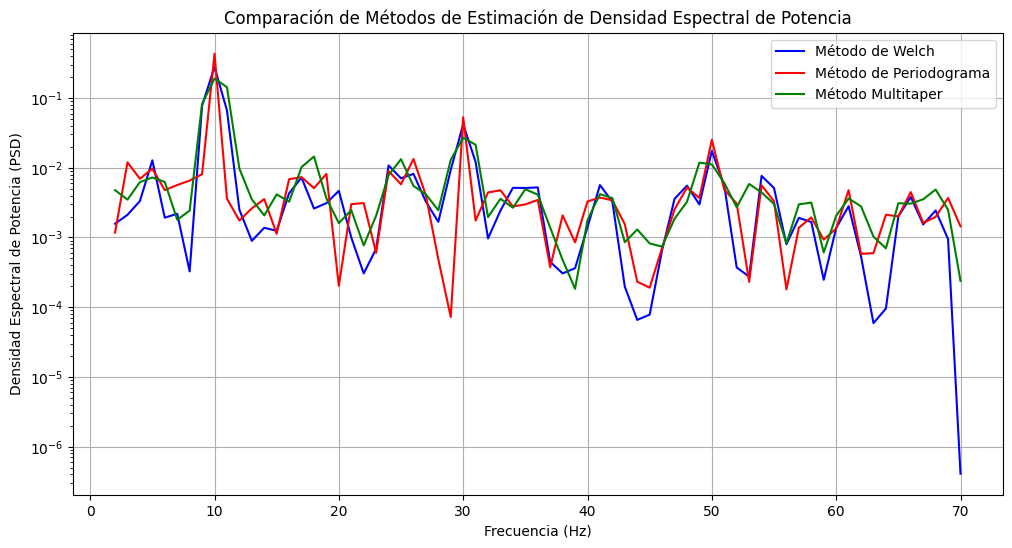

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, periodogram, spectrogram
from mne.time_frequency import psd_array_multitaper  # Paquete multitaper


# Parámetros de la señal
fs = 140  # Frecuencia de muestreo (Hz)
t = np.arange(0, 1, 1/fs)  # Vector de tiempo de 1 segundo

# Frecuencia de la señal (en radianes)
w0 = 2 * np.pi * 10  # Frecuencia de 10 Hz

# Definición de la señal original según la ecuación proporcionada
x_original = np.cos(w0 * t) - (1/3) * np.sin(3*w0 * t) + (1/5) * np.cos(5*w0 * t)

# Añadiendo ruido gaussiano blanco a la señal
ruido = np.random.normal(0, 0.5, t.shape)  # Ruido con desviación estándar de 0.5
x_con_ruido = x_original + ruido

# Método de Welch para estimación de densidad espectral de potencia
f_welch, psd_welch = welch(x_con_ruido, fs, nperseg=256)

# Filtrar las frecuencias para que comiencen desde 2 Hz
mask_welch = f_welch >= 2
f_welch = f_welch[mask_welch]
psd_welch = psd_welch[mask_welch]

# Método de Periodograma para estimación de densidad espectral de potencia
f_periodogram, psd_periodogram = periodogram(x_con_ruido, fs, scaling='density')

# Filtrar las frecuencias para que comiencen desde 2 Hz
mask_periodogram = f_periodogram >= 2
f_periodogram = f_periodogram[mask_periodogram]
psd_periodogram = psd_periodogram[mask_periodogram]

# Método Multitaper para estimación de densidad espectral de potencia
psd_multitaper, f_multitaper = psd_array_multitaper(x_con_ruido, sfreq=fs, fmin=2, fmax=fs/2, adaptive=True, normalization='full', bandwidth=2.5, verbose=0)

# Gráfica de superposición de los tres métodos
plt.figure(figsize=(12, 6))
plt.semilogy(f_welch, psd_welch, label="Método de Welch", color="blue")
plt.semilogy(f_periodogram, psd_periodogram, label="Método de Periodograma", color="red")
plt.semilogy(f_multitaper, psd_multitaper, label="Método Multitaper", color="green")  # Agrega la gráfica del método Multitaper
plt.title("Comparación de Métodos de Estimación de Densidad Espectral de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (PSD)")
plt.legend()
plt.grid()
plt.show()

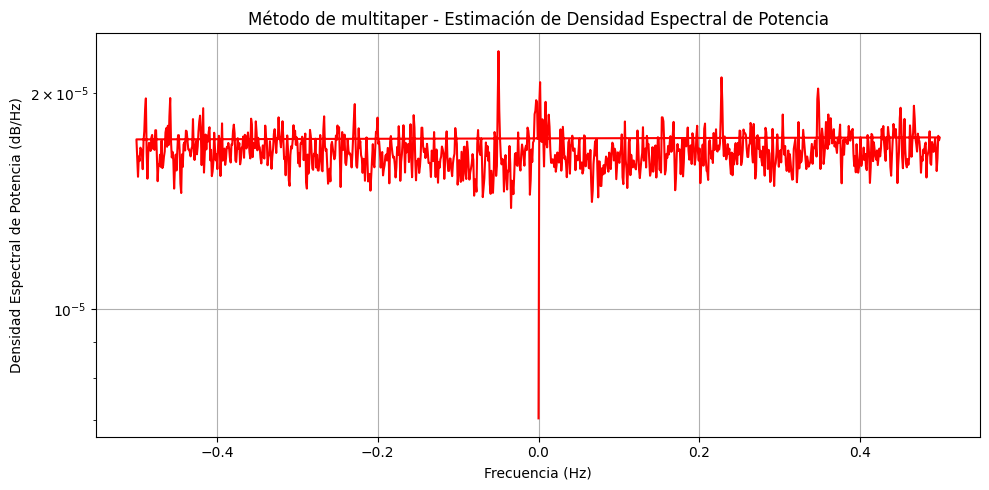

In [ ]:
def multipaper(signal):
    # Si la señal es compleja, se analiza la señal completa
    if np.iscomplexobj(signal):
        analyze_signal(signal, "Señal Compleja")
    else:
        # Análisis de una señal real
        analyze_signal(signal, "Señal Real")

def analyze_signal(signal, title):
    # Aplicando el método "multipaper" que en este ejemplo será el cálculo de la densidad espectral de potencia
    freq, psd = welch(signal, nperseg=1024)

    # Graficar la densidad espectral de potencia
    plt.figure(figsize=(10, 5))
    plt.semilogy(freq, psd, color='red')
    plt.title("Método de multitaper - Estimación de Densidad Espectral de Potencia")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Densidad Espectral de Potencia (dB/Hz)")
    plt.grid()
    plt.tight_layout()
    plt.show()

# Aplicar el método "multipaper" a la señal cargada
multipaper(sample)




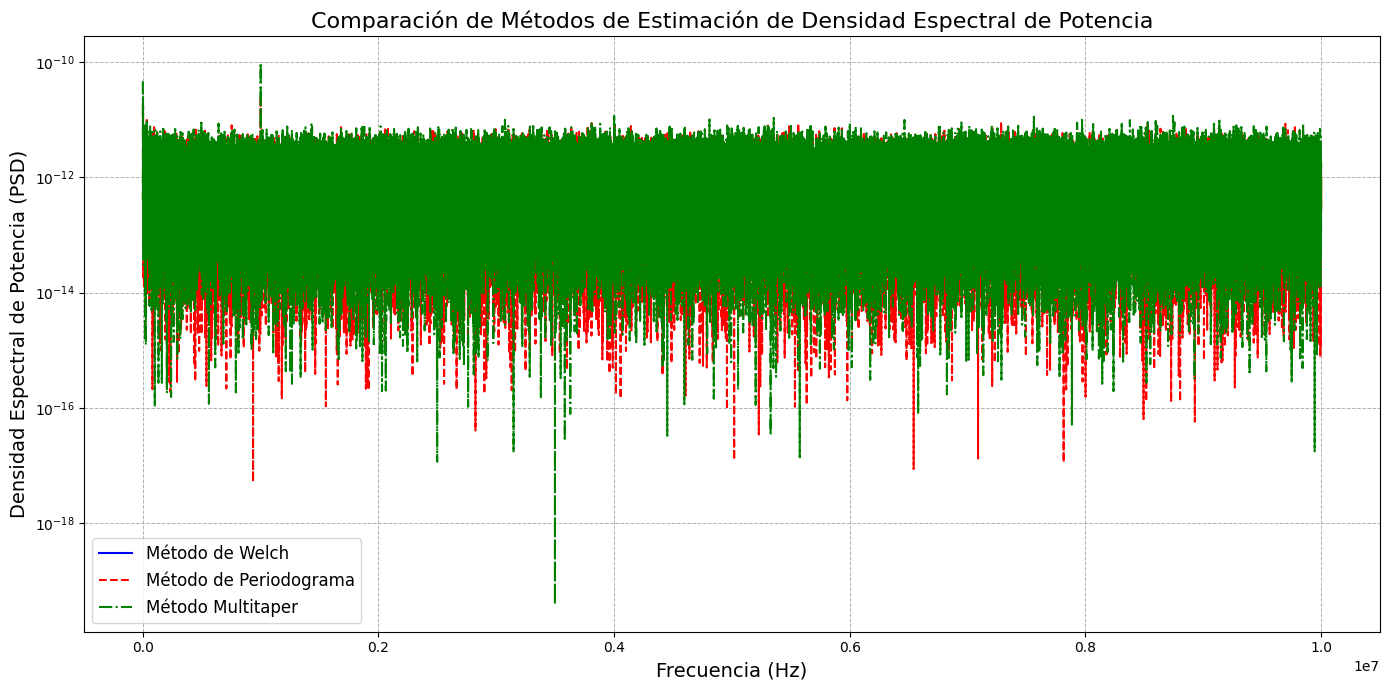

In [ ]:
# Cargar el archivo de muestras
sample = np.load("/content/5G(center freq_ 161000000.0, sample rate_ 20000000.0, vga gain_ 0, lna gain_ 0,num samples_ 200000(1).npy).npy")

# Parámetros de la señal
fs = 20000000  # Frecuencia de muestreo (Hz)

# Método de Welch para estimación de densidad espectral de potencia
f_welch, psd_welch = welch(sample, fs, nperseg=1024)

# Filtrar las frecuencias para que comiencen desde 1 kHz (esto es opcional y depende de lo que necesites)
mask_welch = f_welch >= 1e3
f_welch = f_welch[mask_welch]
psd_welch = psd_welch[mask_welch]

# Método de Periodograma para estimación de densidad espectral de potencia
f_periodogram, psd_periodogram = periodogram(sample, fs)

# Filtrar las frecuencias para que comiencen desde 1 kHz
mask_periodogram = f_periodogram >= 1e3
f_periodogram = f_periodogram[mask_periodogram]
psd_periodogram = psd_periodogram[mask_periodogram]

# Método Multitaper para estimación de densidad espectral de potencia

# Gráfica de superposición de los tres métodos
plt.figure(figsize=(14, 7))
plt.semilogy(f_welch, psd_welch, label="Método de Welch", color="blue", linestyle='-', linewidth=1.5)
plt.semilogy(f_periodogram, psd_periodogram, label="Método de Periodograma", color="red", linestyle='--', linewidth=1.5)
plt.semilogy(f_multitaper, psd_multitaper, label="Método Multitaper", color="green", linestyle='-.', linewidth=1.5)

# Mejorar la visualización
plt.title("Comparación de Métodos de Estimación de Densidad Espectral de Potencia", fontsize=16)
plt.xlabel("Frecuencia (Hz)", fontsize=14)
plt.ylabel("Densidad Espectral de Potencia (PSD)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


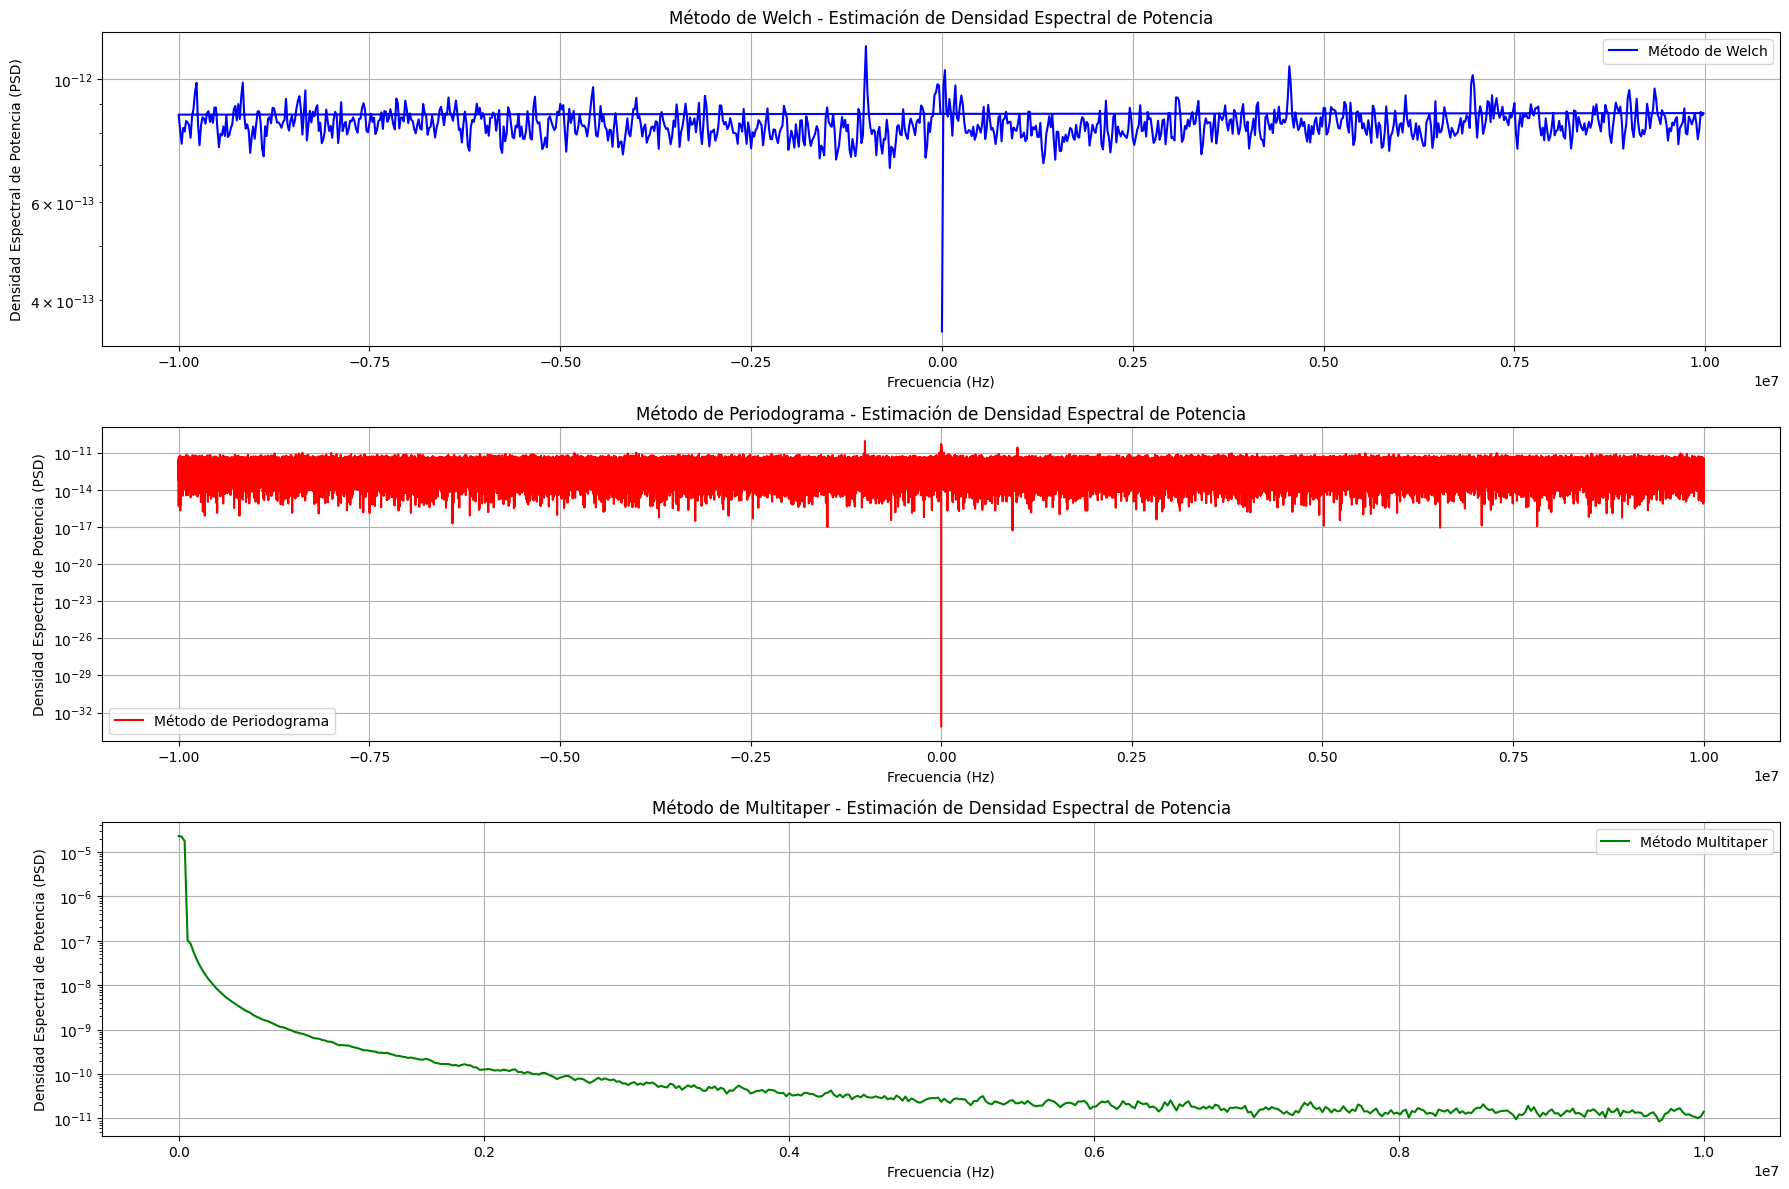

In [ ]:
# Cargar el archivo de muestras
sample = np.load("/content/5G(center freq_ 161000000.0, sample rate_ 20000000.0, vga gain_ 0, lna gain_ 0,num samples_ 200000(1).npy).npy")

# Parámetros de la señal
fs = 20000000  # Frecuencia de muestreo (Hz)
nperseg = 1024  # Tamaño de segmento

# Método de Welch para estimación de densidad espectral de potencia
f_welch, psd_welch = welch(sample, fs, nperseg=nperseg)

# Método de Periodograma para estimación de densidad espectral de potencia
f_periodogram, psd_periodogram = periodogram(sample, fs)

# Método Multitaper para estimación de densidad espectral de potencia para señales complejas
k = 4  # Número de tapers (puedes ajustar este valor)
tapers, eigenvalues = windows.dpss(nperseg, NW=2.5, Kmax=k, return_ratios=True)  # Ventanas DPSS (Slepian)

# Estimación multitaper
psd_multitaper = np.zeros(nperseg // 2 + 1, dtype=np.complex128)
for taper in tapers:
    tapered_signal = sample[:nperseg] * taper  # Aplicar taper a la señal
    spectrum = fft(tapered_signal, n=nperseg)[:nperseg // 2 + 1]
    psd_multitaper += np.abs(spectrum) ** 2

# Promediar los espectros obtenidos
psd_multitaper /= k
psd_multitaper /= fs  # Normalizar por la frecuencia de muestreo
f_multitaper = np.linspace(0, fs / 2, nperseg // 2 + 1)

# Gráfica combinada de los tres métodos con escalas unificadas
plt.figure(figsize=(18, 12))

# Gráfica del método de Welch
plt.subplot(3, 1, 1)
plt.semilogy(f_welch, psd_welch, label="Método de Welch", color="blue")
plt.title("Método de Welch - Estimación de Densidad Espectral de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (PSD)")
plt.legend()
plt.grid()

# Gráfica del método de Periodograma
plt.subplot(3, 1, 2)
plt.semilogy(f_periodogram, psd_periodogram, label="Método de Periodograma", color="red")
plt.title("Método de Periodograma - Estimación de Densidad Espectral de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (PSD)")
plt.legend()
plt.grid()

# Gráfica del método Multitaper
plt.subplot(3, 1, 3)
plt.semilogy(f_multitaper, psd_multitaper, label="Método Multitaper", color="green")
plt.title("Método de Multitaper - Estimación de Densidad Espectral de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (PSD)")
plt.legend()
plt.grid()

# Ajustar el layout para que no se solapen las gráficas
plt.tight_layout()
plt.show()


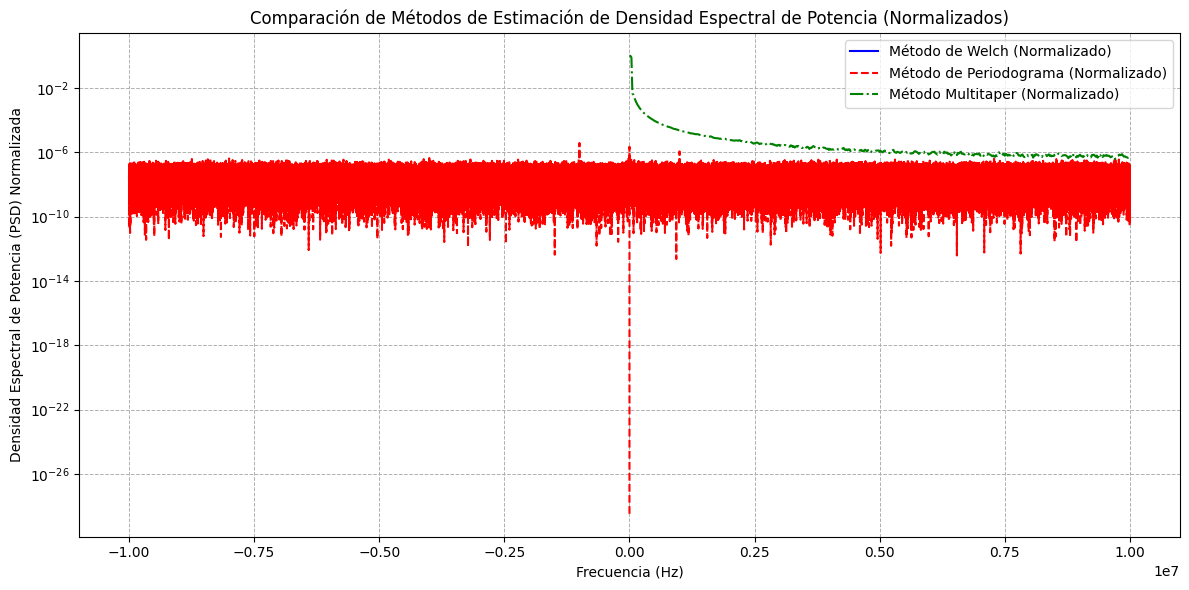

In [ ]:
# Cargar el archivo de muestras
sample = np.load("/content/5G(center freq_ 161000000.0, sample rate_ 20000000.0, vga gain_ 0, lna gain_ 0,num samples_ 200000(1).npy).npy")

# Parámetros de la señal
fs = 20000000  # Frecuencia de muestreo (Hz)
nperseg = 1024  # Tamaño de segmento

# 1. Estimación del espectro usando los tres métodos

# Método de Welch para estimación de densidad espectral de potencia
f_welch, psd_welch = welch(sample, fs, nperseg=nperseg)

# Método de Periodograma para estimación de densidad espectral de potencia
f_periodogram, psd_periodogram = periodogram(sample, fs)

# Método Multitaper para estimación de densidad espectral de potencia (para señales complejas)
k = 4  # Número de tapers (puedes ajustar este valor)
tapers, eigenvalues = windows.dpss(nperseg, NW=2.5, Kmax=k, return_ratios=True)  # Ventanas DPSS (Slepian)

# Estimación multitaper
psd_multitaper = np.zeros(nperseg // 2 + 1, dtype=np.complex128)
for taper in tapers:
    tapered_signal = sample[:nperseg] * taper  # Aplicar taper a la señal
    spectrum = fft(tapered_signal, n=nperseg)[:nperseg // 2 + 1]
    psd_multitaper += np.abs(spectrum) ** 2

# Promediar los espectros obtenidos
psd_multitaper /= k
psd_multitaper /= fs  # Normalizar por la frecuencia de muestreo
f_multitaper = np.linspace(0, fs / 2, nperseg // 2 + 1)

# 2. Normalización de los tres métodos usando el valor máximo global

# Obtener el valor máximo global de los tres PSDs
max_global = max(np.max(psd_welch), np.max(psd_periodogram), np.max(psd_multitaper))

# Normalizar los PSDs dividiéndolos por el valor máximo global
psd_welch_normalized = psd_welch / max_global
psd_periodogram_normalized = psd_periodogram / max_global
psd_multitaper_normalized = psd_multitaper / max_global

# 3. Graficar los tres métodos superpuestos
plt.figure(figsize=(12, 6))
plt.semilogy(f_welch, psd_welch_normalized, label="Método de Welch (Normalizado)", color="blue", linestyle='-')
plt.semilogy(f_periodogram, psd_periodogram_normalized, label="Método de Periodograma (Normalizado)", color="red", linestyle='--')
plt.semilogy(f_multitaper, psd_multitaper_normalized, label="Método Multitaper (Normalizado)", color="green", linestyle='-.')
plt.title("Comparación de Métodos de Estimación de Densidad Espectral de Potencia (Normalizados)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (PSD) Normalizada")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()
